In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


Entering the competition: Running a dummy model to make my first submission

In [2]:
# df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
# X = df.drop('Rating', axis =1)
# y = df['Rating']
# from sklearn.dummy import DummyClassifier
# model = DummyClassifier(strategy='most_frequent').fit(X,y)
# X_test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
# y_pred=model.predict(X_test)

# submission = pd.DataFrame({'ID': range(1,4547),
#                           'total_amount': y_pred})

# submission.to_csv('submission.csv', index=False)

Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
np.random.seed(0)

#### Load dataset

In [5]:
data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')

data.head(2)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...


## Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


#### Checking for missing values

In [7]:
data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

Recipe_Review column has 2 null values. Let us explore further

In [8]:
data[data['Recipe_Review'].isnull()]

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
2984,299,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_260817,u_1oKXz42APTrXTFF6SGvR3YMBJGy,TRGriggs,1,1622717652,0,0,0,5,100,NaN
11654,344,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_260955,u_1oKZmfyycO3xVnQeffIKHuaKT2U,No.1FamilyBaker,1,1622717645,0,0,0,5,100,NaN


I want to use this column later for further text processing so I will get rid of null values and replace them by a blank string "" so that I dont run into errors

In [9]:
data['Recipe_Review'].replace(np.nan, "", inplace=True)

In [10]:
data.iloc[[2984, 11654]]

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
2984,299,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_260817,u_1oKXz42APTrXTFF6SGvR3YMBJGy,TRGriggs,1,1622717652,0,0,0,5,100,
11654,344,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_260955,u_1oKZmfyycO3xVnQeffIKHuaKT2U,No.1FamilyBaker,1,1622717645,0,0,0,5,100,


#### Let's check if there are any duplicate values in our dataset

In [11]:
data.duplicated().value_counts()

False    13636
Name: count, dtype: int64

There are no duplicate values in the dataset

#### Convert date column from unix to datetime format

In [12]:
data['time'] = data['CreationTimestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [13]:
data.tail(3)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,time
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!,2021-06-03 11:01:29
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...,2021-06-03 10:46:32
13635,379,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_278956,u_1oKYPsERQ0GvUcjIsuAxzmnsQGW,morgantowndan,1,1622717703,0,0,0,5,100,Super. I added 1/2 lb chopped bacon to mine. H...,2021-06-03 10:55:03


I split my datetime data into month, day, hour and minute fields. However, this did not help in improving my model performance. So i discarded them from my model.

In [14]:
# data['Month'] = data['time'].apply(lambda x : x.month)
# data['Day'] = data['time'].apply(lambda x : x.day)
# data['Hour'] = data['time'].apply(lambda x : x.hour)
# data['Minute'] = data['time'].apply(lambda x : x.minute)

In [15]:
data.head(2)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,time
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...,2021-06-03 10:44:38
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...,2021-06-03 10:57:32


## Data Visualization

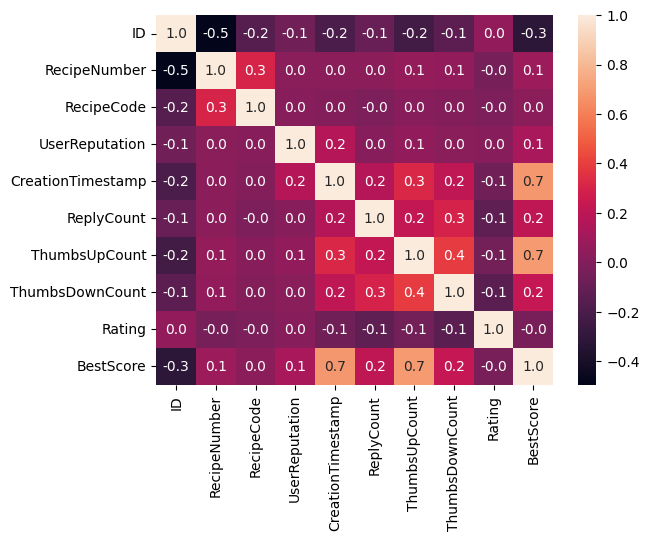

In [16]:
numeric_cols = data.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".1f")
plt.show()

Findings:
1. No column seems to have a strong correlation with our traget column - Ratings
2. Creation timestamp and Thumbs up count have a higher positive correlation with Best Score. We shall explore this further and drop columns that are not required

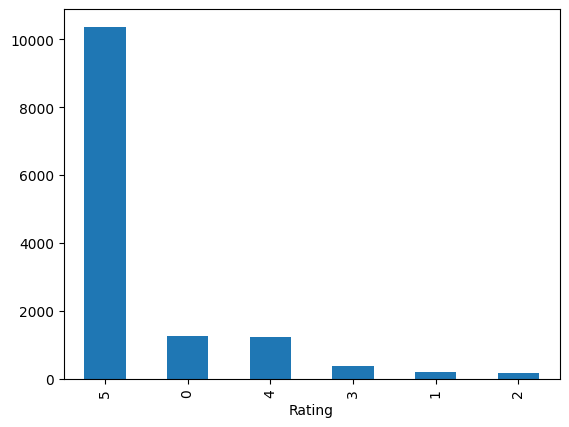

In [17]:
data['Rating'].value_counts().plot(kind='bar')
plt.show()

The above chart shows that we are dealing with an imbalanced dataset. We have 10,000+ rows with a rating of 5. There is very little data for records with a rating of 1, 2 or 3. This needs to be considered while building the model.

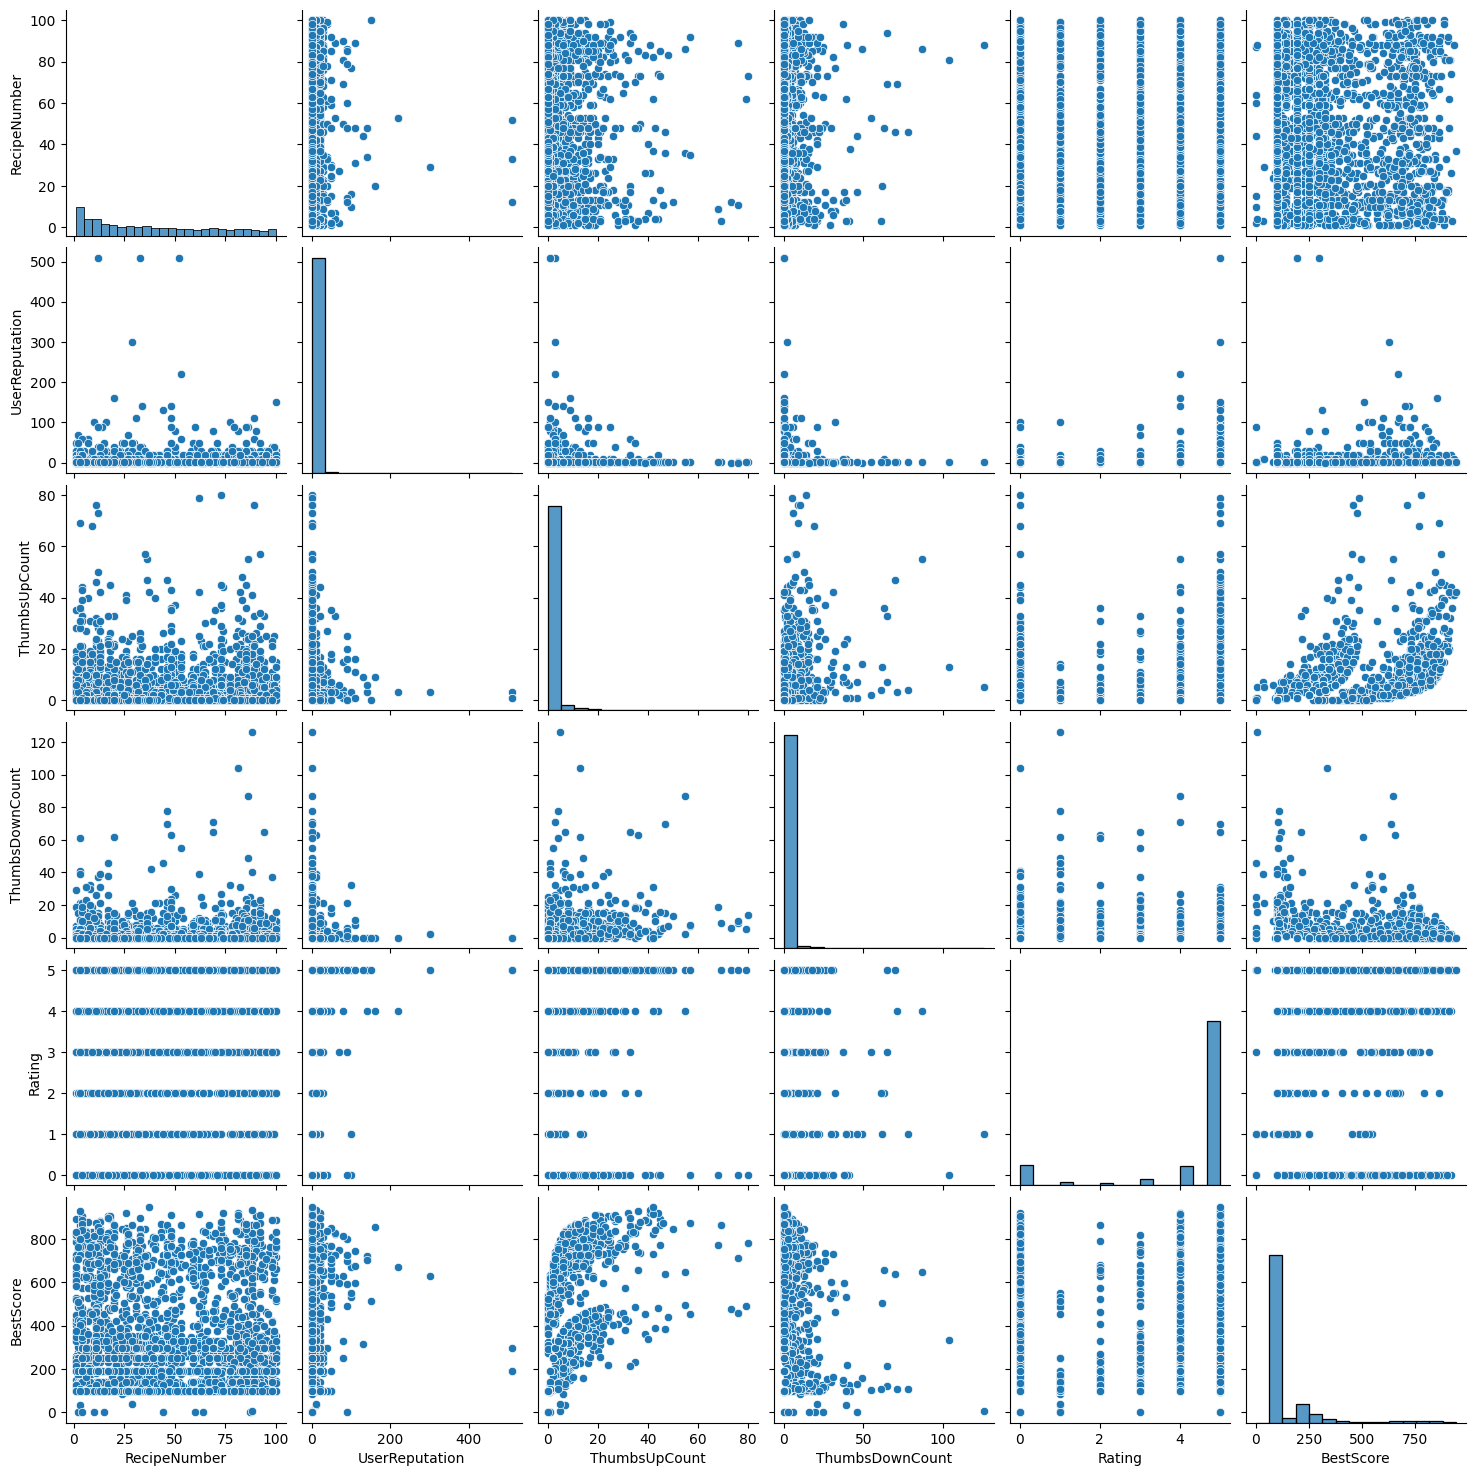

In [18]:
sns.pairplot(data[['RecipeNumber', 'UserReputation', 'ThumbsUpCount', 
                   'ThumbsDownCount', 'Rating', 'BestScore']])
plt.show()

Observation:

1. Thumps up count increases with increase in Rating

In [19]:
pd.pivot_table(data, values = 'UserReputation', index = 'Rating')

,UserReputation
Rating,
0,1.631289
1,1.928571
2,1.833333
3,2.285326
4,2.517325
5,2.188217


The average UserReputation scores increase with higher ratings, but not linearly

#### Exploring how RecipeNumber, RecipeCode and RecipeName are linked

In [20]:
data[data['RecipeNumber'] == 71].head(3)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,time
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...,2021-06-03 10:44:38
172,4,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_432323,u_1tOHuoHsIKxNgRRS2s1MxNt9jg6,GoldApple,0,1622648873,0,2,2,5,167,Just made these banana bars for Easter. They w...,2021-06-02 15:47:53
617,124,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_318162,u_1oKVvQbJjVuvKHTFaOOplRwvy5F,jillgingras,1,1622717934,0,0,0,0,100,This is the best banana bar recipe. It is a fa...,2021-06-03 10:58:54


In [21]:
data[data['RecipeNumber'] == 71][['RecipeCode']].value_counts()

RecipeCode
12259         101
Name: count, dtype: int64

In [22]:
data[data['RecipeNumber'] == 71][['RecipeName']].value_counts()

RecipeName                            
Banana Bars with Cream Cheese Frosting    101
Name: count, dtype: int64

All three fields point to the same record. Including all of them would be redundant and could lead to multicollinearity. I only want to keep Recipe Number since it is an ordinal version of each recipe wherein a lower number indicates a better recipe and hence higher rating. However, I did not want to drop Recipe Name without first finding out if any recipe name included key words which would give more information about the recipe rating. Eg: Having 'pineapple' in the recipe name could indicate a lower rating whereas having 'cheese' or 'chocolate' in recipe name could indicate a higher rating for the recipe. I explored this in the code below, however it did not have any significant impact on my model performance. Hence, I decided to drop the variable RecipeName entirely

In [23]:
# VECTORIZE ALL RECIPE NAMES
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_selection import SelectKBest, f_regression, chi2
# vectorizer = TfidfVectorizer(stop_words='english',max_features=50)
# tfidf_matrix = vectorizer.fit_transform(X_train['RecipeName'])
# # tfidf_matrix_test = vectorizer.transform(X_test['RecipeName'])


# CONVERT THE VECTORIZED NAMES TO A DATAFRAME
# keywords_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# keywords_df_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=vectorizer.get_feature_names_out())


# SET A THRESHOLD TO ONLY INCLUDE IMPORTANT KEYWORDS. WE ARE BINARISING THE 
# DATAFRAME HERE. KEYWORDS TO BE INCLUDED WILL BE ASSIGNED A VALUE OF 1 AND
# EXCLUDED WORDS WILL BE ASSIGNED A VALUE OF 0.
# threshold = keywords_df[keywords_df > 0].stack().mean()
# binary_keywords_df = (keywords_df > threshold).astype(int)
# binary_keywords_df_test = (keywords_df_test > threshold).astype(int)


# binary_keywords_df['Rating'] = y_train.values

# SELECT THE TOP 5 KEYWORDS
# selector = SelectKBest(score_func=chi2, k=5)
# selector.fit(binary_keywords_df.drop('Rating', axis=1), binary_keywords_df['Rating'])

# GET THE NAMES OF THE TOP5 KEYWORDS
# top_indices = selector.get_support(indices=True)
# top_scores = selector.scores_[top_indices]
# top_feature_names = list(binary_keywords_df.columns[top_indices])
# keyword_scores_rounded = [round(score, 5) for score in top_scores]
# print(top_feature_names)
# print(keyword_scores_rounded)

# FIND OUT THE AVERGAE RATING OF ALL RECIPES WHICH HAD THE KEYWORD INCLUDED 
# IN ITS NAME
# rating_dict = {}
# for c in top_feature_names:
#   avg_rating = binary_keywords_df[binary_keywords_df[c] == 1]['Rating'].mean().round(4)
#   rating_dict.update({c: avg_rating})
# rating_dict

# APPENDING THE KEYWORD COLUMNS TO THE ORIGINAL DATAFRAME
# for keyword in top_feature_names:
#     # This creates a new column for each keyword,
#     # setting to 1 where the keyword is found in the 'RecipeName' column, 0 otherwise.
#     X_train[f'keyword_{keyword}'] = X_train['RecipeName'].str.lower().apply(lambda name: 1 if keyword in name else 0)

# for keyword in top_feature_names:
#     # This creates a new column for each keyword,
#     # setting to 1 where the keyword is found in the 'RecipeName' column, 0 otherwise.
#     X_test[f'keyword_{keyword}'] = X_test['RecipeName'].str.lower().apply(lambda name: 1 if keyword in name else 0)

#### Remove unwanted columns

I decided to drop columns with IDs like Comment ID, User ID and other features like User Name since they are unique values which dont really affect a recipe's rating

In [24]:
data.drop(columns=['ID', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName',
                   'ReplyCount', 'time', 'CreationTimestamp'], axis=1, inplace = True)

In [25]:
data.head(2)

,RecipeNumber,UserReputation,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,71,20,0,0,5,100,great recipe! I have made them just as written...
1,88,1,0,1,5,100,This is an easy and quick recipe that is great...


## Train-test Split

In [26]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['Rating'])
y = data.loc[:, 'Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### TFIDF Vectorization

I will be vectoring the column 'Recipe review' since I belive it will contribute significantly to my model performance by extracting certain keywords in user's comments that are indicative of a higher or lower rating

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer() #stop_words = 'english', strip_accents = 'unicode'
X_train_tfidf = tfidf.fit_transform(X_train['Recipe_Review'])
tfidf.get_feature_names_out()

array(['00', '03', '04', ..., 'zuchinni', 'zucs', 'zuke'], dtype=object)

In [29]:
X_train_tfidf.shape

(10908, 9449)

In [30]:
X_test_tfidf = tfidf.transform(X_test['Recipe_Review'])

In [31]:
X_train.drop(columns=['Recipe_Review'], inplace= True)
X_test.drop(columns=['Recipe_Review'], inplace= True)

In [32]:
X_train.head(2)

,RecipeNumber,UserReputation,ThumbsUpCount,ThumbsDownCount,BestScore
3717,47,1,0,0,100
12430,12,1,0,0,100


#### Dimensionality Reduction

We get 9,000+ features after applying TDIDF vectorization on our Recipe Review column. We need to reduce the dimensionality since we cannot have these many variables in our data. I am going to use SVD to reduce the number of features. Unlike PCA, SVD works with sparse matrices, making it suitable for TF-IDF matrices. It reduces the feature space while preserving the relationships among documents.

In [33]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, random_state=42) #tried with n_components raning from 100-350
reduced_tfidf = svd.fit_transform(X_train_tfidf)
reduced_tfidf_test = svd.transform(X_test_tfidf)

In [34]:
reduced_tfidf.shape

(10908, 300)

Combine datasets

In [35]:
X = X_train.iloc[:, :].values
X_testdata = X_test.iloc[:,:].values

In [36]:
from scipy.sparse import hstack
combined_data = np.hstack([X, reduced_tfidf])
combined_data_test = np.hstack([X_testdata, reduced_tfidf_test])

In [37]:
combined_data[:5]

array([[ 4.70000000e+01,  1.00000000e+00,  0.00000000e+00, ...,
         4.99201347e-02,  2.96350607e-02, -3.71341886e-02],
       [ 1.20000000e+01,  1.00000000e+00,  0.00000000e+00, ...,
        -3.63319936e-02,  1.70561171e-02,  3.54072831e-02],
       [ 4.10000000e+01,  1.00000000e+00,  0.00000000e+00, ...,
         3.20807903e-02, -3.33562111e-02,  9.86248415e-03],
       [ 1.30000000e+01,  1.00000000e+00,  1.30000000e+01, ...,
         3.39093062e-02, -3.68078374e-02, -3.20067154e-02],
       [ 9.80000000e+01,  1.00000000e+00,  0.00000000e+00, ...,
         2.68022227e-02, -1.74814216e-02,  2.04558599e-02]])

In [38]:
combined_data_test[:5]

array([[ 1.40000000e+01,  1.00000000e+00,  0.00000000e+00, ...,
         1.57019315e-02,  1.01809150e-02,  1.39395283e-02],
       [ 5.60000000e+01,  1.00000000e+01,  0.00000000e+00, ...,
         1.23729050e-02, -1.20496080e-03, -5.24254484e-03],
       [ 8.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.74233443e-02,  6.09686274e-03,  3.27817682e-02],
       [ 1.10000000e+01,  1.00000000e+00,  0.00000000e+00, ...,
        -7.61640639e-03, -1.98575969e-02,  1.40981297e-02],
       [ 5.40000000e+01,  1.00000000e+00,  0.00000000e+00, ...,
         3.34996672e-02, -5.97588770e-03, -1.76942976e-03]])

## Feature Selection

In [39]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(mutual_info_classif, k=200) #tried with k ranging from 100-300
combined_data = selector.fit_transform(combined_data, y_train)
combined_data_test = selector.transform(combined_data_test)

#### SMOTE 
Using Imblearn to correct imbalanced data and make predictions again. Since I am dealing with imbalanced data, I thought using SMOTE will help me genrate more samples of the under-represented class, giving me a more balanced dataset and hence help in model training and performance. However, it DID NOT IMPROVE MODEL PERFORMANCE IN ANY CASE. So I did not use it.

In [40]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42, k_neighbors=7) #k_neighbors = 3,7,9
# X_new, y_new = sm.fit_resample(combined_data, y_train)

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(combined_data)
X_test_scaled = sc.transform(combined_data_test)

## Model Building

I trained 4 models on my data - Logistic regression, KNN, Random Forest classifier and XGBoost

#### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
params = {'warm_start' : [True], 
          'penalty': ['l1', 'l2', 'elasticnet'], 
          'max_iter' : [500, 1000, 1500], 'solver': ['saga']}
classifier_lg = RandomizedSearchCV(
    estimator = LogisticRegression(random_state = 42), 
    param_distributions = params, cv = 5, random_state=42)
classifier_lg.fit(X_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'max_iter': [500, 1000, 1500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['saga'],
                                        'warm_start': [True]},
                   random_state=42)

In [43]:
classifier_lg.best_params_

{'warm_start': True, 'solver': 'saga', 'penalty': 'l1', 'max_iter': 500}

In [44]:
from sklearn.metrics import classification_report, accuracy_score
y_pred_lg = classifier_lg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.50      0.10      0.16       257
           1       0.30      0.20      0.24        41
           2       0.15      0.12      0.13        34
           3       0.25      0.11      0.15        85
           4       0.36      0.10      0.15       250
           5       0.80      0.98      0.88      2061

    accuracy                           0.76      2728
   macro avg       0.39      0.26      0.28      2728
weighted avg       0.70      0.76      0.70      2728



In [45]:
acc_score_lg = accuracy_score(y_test, y_pred_lg)
acc_score_lg

0.7628299120234604

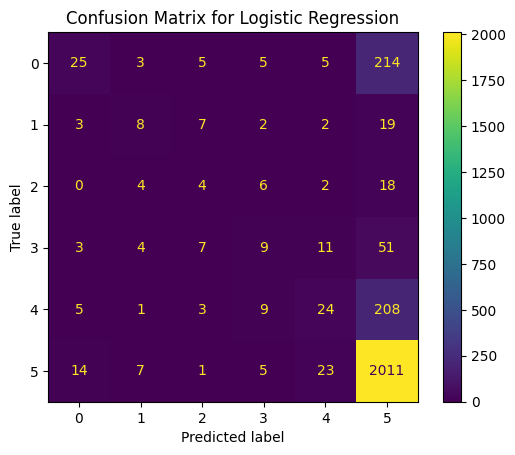

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lg)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
params = {'n_neighbors' : [17, 19, 21, 23, 25], #tried ranges 1 - 40
          "metric": ['euclidean', 'manhattan'],
          'weights': ['uniform', 'distance']}
classifier_knn = RandomizedSearchCV(estimator = KNeighborsClassifier(), 
                         param_distributions = params, cv = 5, 
                         random_state=42)
classifier_knn.fit(X_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [17, 19, 21, 23, 25],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [48]:
classifier_knn.best_params_

{'weights': 'distance', 'n_neighbors': 21, 'metric': 'euclidean'}

In [49]:
from sklearn.metrics import classification_report, accuracy_score
y_pred_knn = classifier_knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.50      0.04      0.07       257
           1       0.60      0.07      0.13        41
           2       0.00      0.00      0.00        34
           3       1.00      0.02      0.05        85
           4       0.67      0.02      0.03       250
           5       0.76      1.00      0.86      2061

    accuracy                           0.76      2728
   macro avg       0.59      0.19      0.19      2728
weighted avg       0.72      0.76      0.67      2728



In [50]:
acc_score_knn = accuracy_score(y_test, y_pred_knn)
acc_score_knn

0.7595307917888563

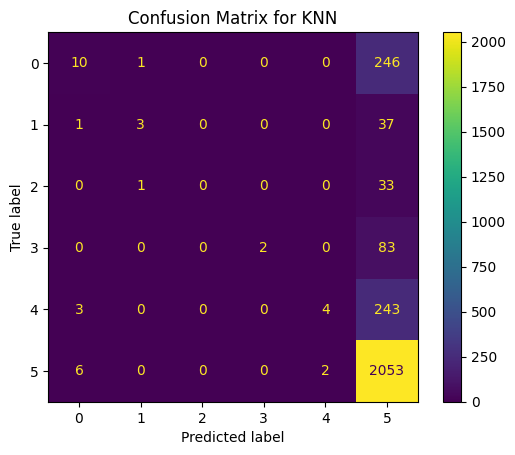

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.title('Confusion Matrix for KNN')
plt.show()

#### Random Forest - without hyperparameter tuning

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(X_scaled, y_train)

RandomForestClassifier(random_state=42)

In [53]:
from sklearn.metrics import classification_report, accuracy_score
y_pred_rf = classifier_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.04      0.07       257
           1       1.00      0.02      0.05        41
           2       0.00      0.00      0.00        34
           3       1.00      0.04      0.07        85
           4       0.40      0.02      0.03       250
           5       0.76      1.00      0.86      2061

    accuracy                           0.76      2728
   macro avg       0.68      0.18      0.18      2728
weighted avg       0.74      0.76      0.66      2728



In [54]:
acc_score_rf = accuracy_score(y_test, y_pred_rf)
acc_score_rf

0.7595307917888563

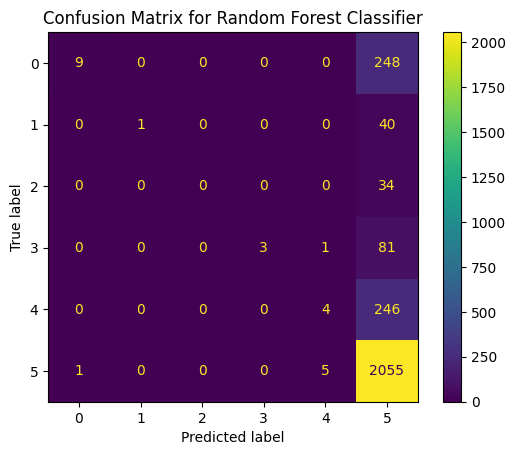

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

#### Random Forest - with hyperparameter tuning

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators' : [100, 200, 300], 
          "criterion": ['gini', 'entropy', 'log_loss'],
          'max_features': ['sqrt', 'log2'], 'class_weight' : ['balanced']}
classifier_rf_hp = RandomizedSearchCV(estimator = RandomForestClassifier(
    random_state=42), param_distributions = params,cv = 5, random_state=42)

classifier_rf_hp.fit(X_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [58]:
classifier_rf_hp.best_params_

{'n_estimators': 300,
 'max_features': 'sqrt',
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [59]:
from sklearn.metrics import classification_report, accuracy_score
y_pred_rf_hp = classifier_rf_hp.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf_hp))

              precision    recall  f1-score   support

           0       0.89      0.03      0.06       257
           1       1.00      0.02      0.05        41
           2       0.00      0.00      0.00        34
           3       1.00      0.04      0.07        85
           4       0.44      0.02      0.03       250
           5       0.76      1.00      0.86      2061

    accuracy                           0.76      2728
   macro avg       0.68      0.18      0.18      2728
weighted avg       0.74      0.76      0.66      2728



In [60]:
acc_score_rf_hp = accuracy_score(y_test, y_pred_rf_hp)
acc_score_rf_hp

0.7591642228739003

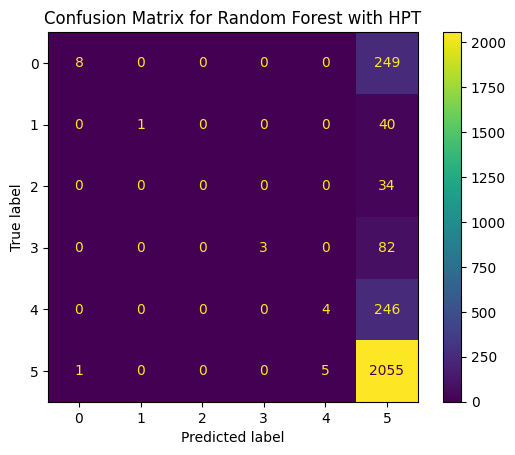

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_hp)
plt.title('Confusion Matrix for Random Forest with HPT')
plt.show()

#### XGBoost - without hyperparameter tuning

In [62]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=42)
classifier_xgb.fit(X_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
from sklearn.metrics import classification_report, accuracy_score
y_pred_xgb = classifier_xgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.63      0.13      0.21       257
           1       0.38      0.07      0.12        41
           2       0.00      0.00      0.00        34
           3       0.50      0.08      0.14        85
           4       0.45      0.10      0.16       250
           5       0.78      0.99      0.87      2061

    accuracy                           0.77      2728
   macro avg       0.46      0.23      0.25      2728
weighted avg       0.71      0.77      0.70      2728



In [64]:
acc_score_xgb = accuracy_score(y_test, y_pred_xgb)
acc_score_xgb

0.7716275659824047

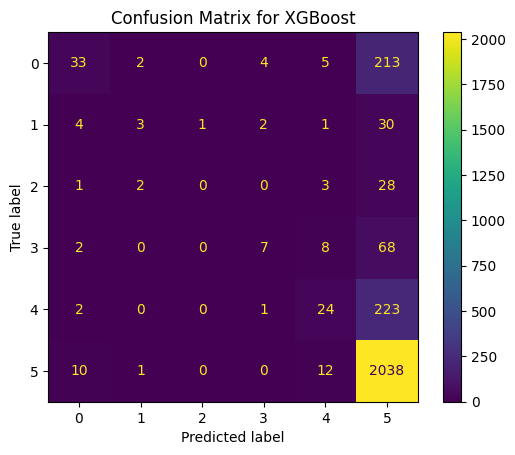

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.title('Confusion Matrix for XGBoost')
plt.show()

#### XGBoost - with hyperparameter tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

params = {'n_estimators': [100, 200, 300, 400],           #default = 100
          'learning_rate': np.linspace(0.01, 0.3, num=20),#default = 0.3
          'max_depth': [3, 4, 5, 6, 7, 8],                #default = 6
          'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],    #default = 1
          'subsample': [0.6, 0.7, 0.8, 0.9, 1]}           #default = 1

classifier_xgb_hp = RandomizedSearchCV(
    estimator = XGBClassifier(random_state=42), 
    param_distributions = params,cv = 5, random_state=42)

classifier_xgb_hp.fit(X_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'learning_rate': array([0.01      , 0.02526316, 0.04052632, 0.05578947, 0.07105263,
       0.08631579, 0.10157895, 0.11684211, 0.13210526, 0.14736842,
       0.16263158, 0.17789474, 0.19315789, 0.20842105, 0.22368421,
       0.23894737, 0.25421053, 0.26947368, 0.28473684, 0.3       ]),
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
                   random_state=42)

In [67]:
classifier_xgb_hp.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'max_depth': 4,
 'learning_rate': 0.05578947368421053,
 'colsample_bytree': 0.8}

In [68]:
from sklearn.metrics import classification_report, accuracy_score
y_pred_xgb_hp = classifier_xgb_hp.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb_hp))

              precision    recall  f1-score   support

           0       0.54      0.08      0.14       257
           1       0.38      0.07      0.12        41
           2       0.25      0.03      0.05        34
           3       0.67      0.07      0.13        85
           4       0.30      0.04      0.08       250
           5       0.77      0.99      0.87      2061

    accuracy                           0.76      2728
   macro avg       0.48      0.21      0.23      2728
weighted avg       0.69      0.76      0.68      2728



In [69]:
acc_score_xgb_hp = accuracy_score(y_test, y_pred_xgb_hp)
acc_score_xgb_hp

0.7628299120234604

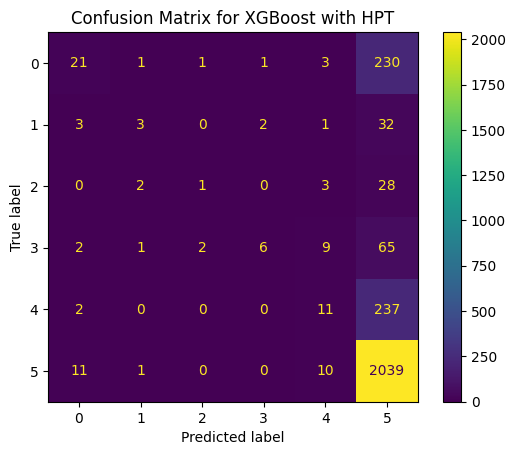

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb_hp)
plt.title('Confusion Matrix for XGBoost with HPT')
plt.show()

In [71]:
models = ['Logistic regression', 'KNN Classifier', 'Random Forest Classifier', 
          'Random Forest Classifier with hpyerparameter tuning', 'XGBoost Classifier',
         'XGBoost Classifier with hyperparameter tuning']

accuracy_scores = [acc_score_lg, acc_score_knn, acc_score_rf, acc_score_rf_hp, 
                   acc_score_xgb, acc_score_xgb_hp]

finding = pd.DataFrame()
finding['Model'] = models
finding['Accuracy score'] = accuracy_scores
finding

,Model,Accuracy score
0,Logistic regression,0.762830
1,KNN Classifier,0.759531
2,Random Forest Classifier,0.759531
3,Random Forest Classifier with hpyerparameter t...,0.759164
4,XGBoost Classifier,0.771628
5,XGBoost Classifier with hyperparameter tuning,0.762830


As it can be observed, XGBoost without hyperparameter tuning has given the highest accuracy score on validation data. Hence, we will be fitting this model on our test data

## Fitting model to actual test data

In [72]:
test_df_og = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
test_df_og.head(2)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."


In [73]:
test_df = test_df_og.drop(columns=['ID', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName',
                   'CreationTimestamp', 'ReplyCount'], axis=1)

In [74]:
test_df['Recipe_Review'].replace(np.nan, "", inplace=True)
test_df_tfidf = tfidf.transform(test_df['Recipe_Review'])
test_df.drop(columns=['Recipe_Review'], inplace= True)

In [75]:
reduced_tfidf_test_df = svd.transform(test_df_tfidf)
X_testdf = test_df.iloc[:,:].values
combined_testdf = np.hstack([X_testdf, reduced_tfidf_test_df])
combined_testdf = selector.transform(combined_testdf)
X_testdf_scaled = sc.transform(combined_testdf)
y_pred_test = classifier_xgb.predict(X_testdf_scaled)

In [76]:
predict = pd.DataFrame(columns=["Rating"])
predict['Rating'] = y_pred_test
predict.index += 1
predict.to_csv("submission.csv",index=True,index_label="ID")